In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
data = pd.read_excel('Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
data["Date"] = pd.to_datetime(data.Month,format="%b-%y")

In [4]:
data

,Month,Passengers,Date
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01
...,...,...,...
91,2002-08-01,405,2002-08-01
92,2002-09-01,355,2002-09-01
93,2002-10-01,306,2002-10-01
94,2002-11-01,271,2002-11-01


In [5]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"] = data.Date.dt.strftime("%Y") # year extraction

data.head()

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995


<Axes: xlabel='month', ylabel='year'>

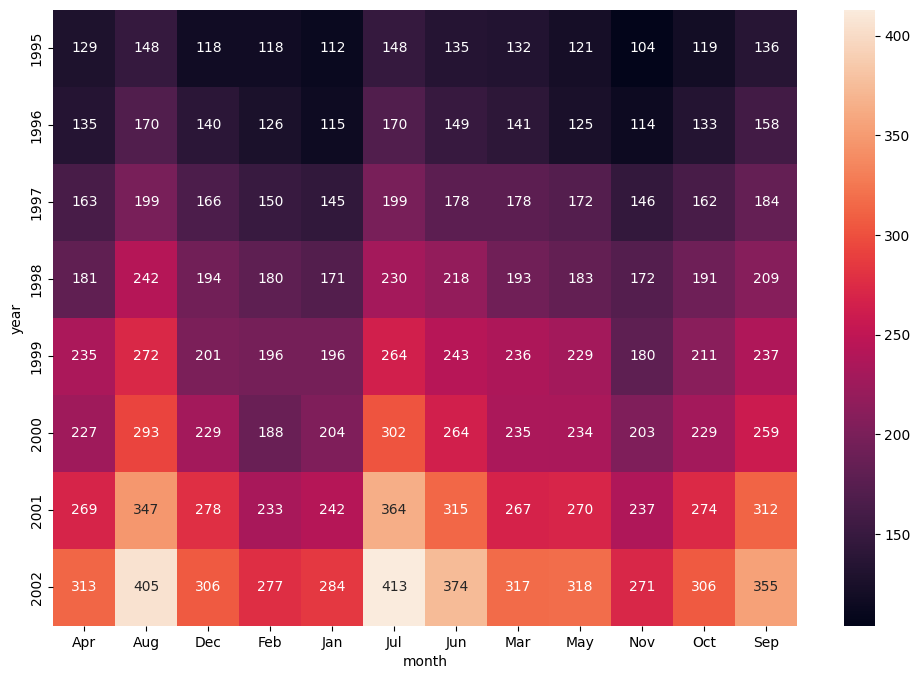

In [6]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

From the heat map we can see that the number of passengers are increasing from 1995 to 2002. And also the number of passengers during the summer season appears to be higher when compared to the months of winter. Probably due to more people taking vacations.

<Axes: xlabel='year', ylabel='Passengers'>

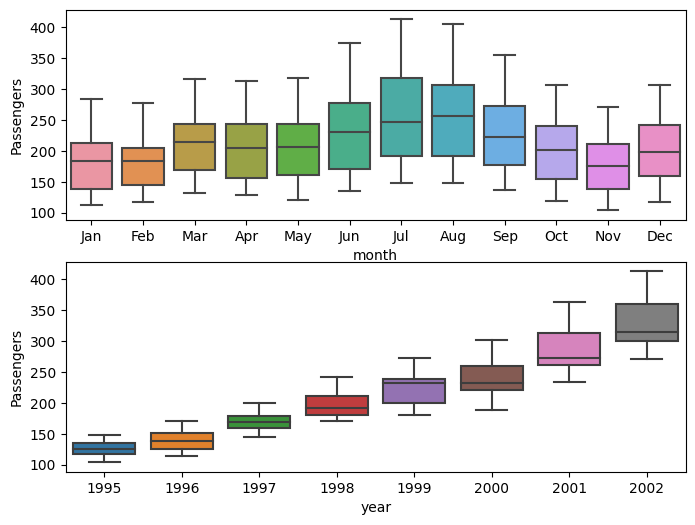

In [7]:
# Boxplots month wise and year wise
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data)

The observations here are same as those from the heat maps.

<Axes: xlabel='year', ylabel='Passengers'>

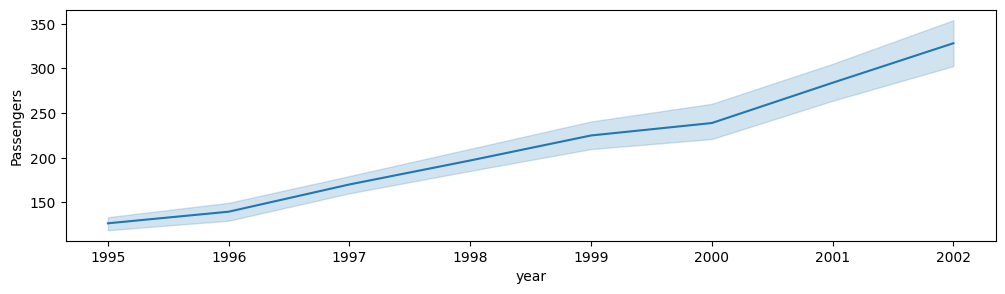

In [8]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data) 

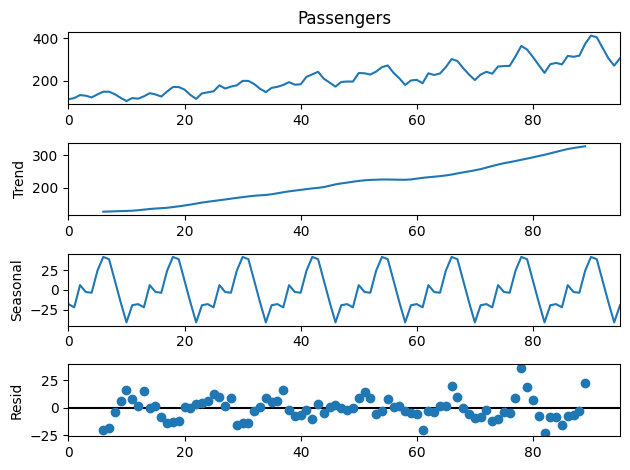

In [9]:
## Decomposing the series to find the seasonal component, trend, any noise separately

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show() 

From the decomposed series we can see that there is an increasing trend which is almost linear, and also there is a very clear seasonal component which is repeating in a cycle. And also there are some noisy points present in the data.

## Training the model

First the data should be split into training and testing sets. Then the training data is used and different models will be trained. Among these models the best one is selected using the minimum RMSE criterion. Then that best model is once again trained with the whole dataset and the final model will be used to predict for the next year.

For working with all the models we need to add the following columns to the dataset.

The t column that contains the row number and the t_square column that contains the square the t column. The logarithm of the Passengers column and the dummy values of the month column.

In [14]:
data_1 = pd.get_dummies(data['month'])
data_1

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
data = data.join(data_1)

In [21]:
data

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
data['t'] = range(1, len(data)+1)
data

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95


In [24]:
data['t_square'] = data['t']*data['t']
data

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025


In [25]:
from numpy import log
data['log_passengers'] = log(data['Passengers'])
data

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_passengers
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


The required columns have been created. The next step is to split the data and train the models

## Splitting the data

In [26]:
Train = data.head(67)
Test = data.tail(29)  

### Linear model

In [27]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2)) 
rmse_linear

47.562517042292235

### Exponential model

In [28]:
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

42.21818467858797

### Quadratic model

In [29]:
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad 

43.090083301719694

### Additive seasonality

In [39]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea 

123.90769027309113

### Additive seasonality quadratic

In [32]:
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

28.952107827326937

### Multiplicative seasonality

In [35]:
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

128.1752827668985

### Multiplicative seasonality with linear trend

In [36]:
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

12.476147646576663

### Multiplicative seasonality with quadratic trend

In [59]:
Mul_Add_sea_quad = smf.ols('log_passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea_quad = pd.Series(Mul_Add_sea_quad.predict(Test))
rmse_Mult_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea_quad)))**2))
rmse_Mult_add_sea_quad

26.752802338581066

## Comparing the results from all the models

In [60]:
data_rmse = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea", "rmse_Mult_add_sea_quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea, rmse_Mult_add_sea_quad])}
table_rmse=pd.DataFrame(data_rmse)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,12.476148
7,rmse_Mult_add_sea_quad,26.752802
4,rmse_add_sea_quad,28.952108
1,rmse_Exp,42.218185
2,rmse_Quad,43.090083
0,rmse_linear,47.562517
3,rmse_add_sea,123.907690
5,rmse_Mult_sea,128.175283


--------

**The multiplicative seasonal with linear trend model has the least rmse value. So is the best model.**

## Predicting for the next year

Train the model with the whole dataset and predict for the next year.

The dataset used here is not for this assignment. So the columns t and t_square should be changed

In [41]:
predict_data = pd.read_csv("Predict_new (2).csv")  

In [42]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [44]:
predict_data.drop(['Month', 't', 't_square'], axis=1, inplace=True)

In [45]:
predict_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,0,0,0,0,0,0


In [47]:
predict_data['t'] = range(97, 109)
predict_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t
0,0,0,0,1,0,0,0,0,0,0,0,0,97
1,0,0,0,0,1,0,0,0,0,0,0,0,98
2,0,0,0,0,0,1,0,0,0,0,0,0,99
3,0,0,0,0,0,0,1,0,0,0,0,0,100
4,0,0,0,0,0,0,0,1,0,0,0,0,101
5,0,0,0,0,0,0,0,0,1,0,0,0,102
6,0,0,0,0,0,0,0,0,0,1,0,0,103
7,0,0,0,0,0,0,0,0,0,0,1,0,104
8,0,0,0,0,0,0,0,0,0,0,0,1,105
9,1,0,0,0,0,0,0,0,0,0,0,0,106


In [48]:
predict_data['t_square'] = predict_data['t'] * predict_data['t']
predict_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,0,0,0,1,0,0,0,0,0,0,0,0,97,9409
1,0,0,0,0,1,0,0,0,0,0,0,0,98,9604
2,0,0,0,0,0,1,0,0,0,0,0,0,99,9801
3,0,0,0,0,0,0,1,0,0,0,0,0,100,10000
4,0,0,0,0,0,0,0,1,0,0,0,0,101,10201
5,0,0,0,0,0,0,0,0,1,0,0,0,102,10404
6,0,0,0,0,0,0,0,0,0,1,0,0,103,10609
7,0,0,0,0,0,0,0,0,0,0,1,0,104,10816
8,0,0,0,0,0,0,0,0,0,0,0,1,105,11025
9,1,0,0,0,0,0,0,0,0,0,0,0,106,11236


In [49]:
#Build the model on entire data set
model_full = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=data).fit() 

In [62]:
pred_new  = pd.Series(model_full.predict(predict_data)) 
pred_new = np.exp(pred_new)
pred_new

0     349.997274
1     347.721709
2     393.564370
3     437.684729
4     436.759314
5     391.170466
6     343.446643
7     301.443117
8     345.546792
9     354.886577
10    358.641320
11    413.849253
dtype: float64

In [63]:
predict_data["Forecasted_Passengers"] = pd.Series(pred_new) 

In [64]:
predict_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,Forecasted_Passengers
0,0,0,0,1,0,0,0,0,0,0,0,0,97,9409,349.997274
1,0,0,0,0,1,0,0,0,0,0,0,0,98,9604,347.721709
2,0,0,0,0,0,1,0,0,0,0,0,0,99,9801,393.564370
3,0,0,0,0,0,0,1,0,0,0,0,0,100,10000,437.684729
4,0,0,0,0,0,0,0,1,0,0,0,0,101,10201,436.759314
5,0,0,0,0,0,0,0,0,1,0,0,0,102,10404,391.170466
6,0,0,0,0,0,0,0,0,0,1,0,0,103,10609,343.446643
7,0,0,0,0,0,0,0,0,0,0,1,0,104,10816,301.443117
8,0,0,0,0,0,0,0,0,0,0,0,1,105,11025,345.546792
9,1,0,0,0,0,0,0,0,0,0,0,0,106,11236,354.886577


------------------

The model has been trained on the entire dataset and the predictions for the next year which is 2003 has been made.